In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [18]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [19]:
# Display the data table for preview

In [20]:
# Combine the data into a single dataset (inner join)
merge_data = pd.merge(city_data, ride_data, on="city")
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [21]:
# Filter the DataFrame to those columns to chart
merge_data_full_join = merge_data[["city","date","fare","ride_id","driver_count","type"]]
merge_data_full_join.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

In [22]:
# Obtain the x and y coordinates for each of the three city types
#Create a separate dataframe for each of the types
only_urban = merge_data_full_join.loc[merge_data_full_join["type"] == "Urban"]
only_suburban = merge_data_full_join.loc[merge_data_full_join["type"] == "Suburban"]
only_rural = merge_data_full_join.loc[merge_data_full_join["type"] == "Rural"]
only_urban.head()

# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [23]:
#group by city for each data frame
urban_city_group = only_urban.groupby(["city"])
suburban_city_group = only_suburban.groupby(["city"])
rural_city_group = only_rural.groupby(["city"])

In [24]:
urban_x = urban_city_group.city.count()
urban_y = round(urban_city_group.fare.mean(),2)
urban_z = urban_city_group.driver_count.mean()

suburban_x = suburban_city_group.city.count()
suburban_y = round(suburban_city_group.fare.mean(),2)
suburban_z = suburban_city_group.driver_count.mean()

rural_x = rural_city_group.city.count()
rural_y = round(rural_city_group.fare.mean(),2)
rural_z = rural_city_group.driver_count.mean()

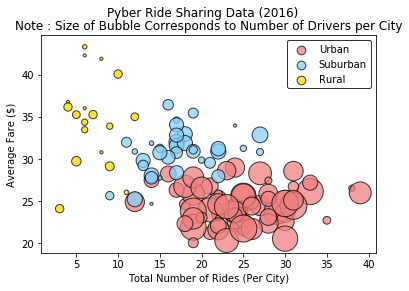

In [38]:
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
                                                                                
                                                                     
plt.scatter(x=urban_x, y=urban_y, s=urban_z*10, color="lightcoral", alpha=0.75, linewidth=1, label = 'Urban', edgecolors="black")
plt.scatter(x=suburban_x, y=suburban_y, s=suburban_z*10, color="lightskyblue", alpha=0.75, label = 'Suburban', linewidth =1, edgecolors="black")
plt.scatter(x=rural_x, y=rural_y, s=rural_z*10, color="gold", label = 'Rural', alpha=0.75, linewidth=1, edgecolors="black")

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

In [26]:
# Show plot
plt.show()

## Total Fares by City Type

In [27]:
# Calculate Type Percents
urbanfare = only_urban.fare.sum()
suburbanfare = only_suburban.fare.sum()
ruralfare = only_rural.fare.sum()

'..UKED201811DATA5/02-Homework/05-Matplotlib/Instructions/Images/PyPies_Total Fares by City Type.png'

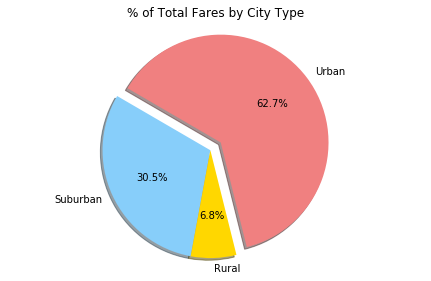

In [31]:
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urbanfare, suburbanfare, ruralfare]
colors = ["lightcoral", "lightskyblue", "Gold"]

explode = (0.12, 0, 0,)
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-76)
wedgeprops = {'linewidth': .5, 'edgecolor': 'black'}
#total_rides = merge_data.plot(kind="pie", y=[Urban, Rural, Suburban], title=("% of Total Fares by City Type"))

plt.title('% of Total Fares by City Type')
plt.tight_layout()
plt.axis("equal")
# Save Figure
("..UKED201811DATA5/02-Homework/05-Matplotlib/Instructions/Images/PyPies_Total Fares by City Type.png")

In [17]:
# Show Figure
plt.show()

## Total Rides by City Type

'..UKED201811DATA5/02-Homework/05-Matplotlib/Instructions/Images/PyPies_Total Rides by City Type.png'

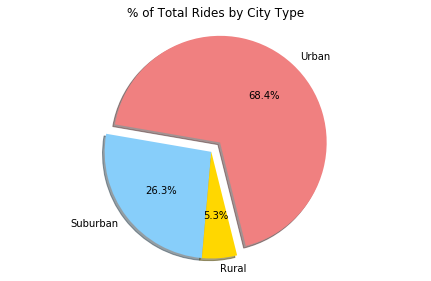

In [32]:
# Calculate Ride Percents

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [68.4, 26.3, 5.3,]
colors = ["lightcoral", "lightskyblue", "Gold"]

explode = (0.12, 0, 0,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-76)
wedgeprops = {'linewidth': .5, 'edgecolor': 'black'}

#total_rides = merge_data.plot(kind="pie", y=[Urban, Rural, Suburban], title=("% of Total Rides by City Type"))

plt.title('% of Total Rides by City Type')
plt.tight_layout()
plt.axis("equal")
# Save Figure
("..UKED201811DATA5/02-Homework/05-Matplotlib/Instructions/Images/PyPies_Total Rides by City Type.png")

In [19]:
# Show Figure
plt.show()

## Total Drivers by City Type

'..UKED201811DATA5/02-Homework/05-Matplotlib/Instructions/Images/PyPies_Total Drivers by City Type.png'

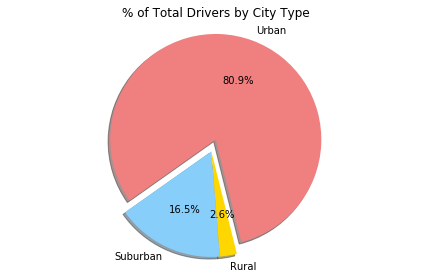

In [33]:
# Calculate Driver Percents

# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
sizes = [80.9, 16.5, 2.6,]
colors = ["lightcoral", "lightskyblue", "Gold"]

explode = (0.12, 0, 0,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-76)
wedgeprops = {'linewidth': .5, 'edgecolor': 'black'}

#total_drivers = merge_data.plot(kind="pie", y=[Urban, Rural, Suburban], title=("% of Total Drivers by City Type"))

plt.title('% of Total Drivers by City Type')
plt.tight_layout()
plt.axis("equal")
# Save Figure
("..UKED201811DATA5/02-Homework/05-Matplotlib/Instructions/Images/PyPies_Total Drivers by City Type.png")

In [21]:
# Show Figure
plt.show()